# Unit I: Climate Change Module

## Lesson 1: Introduction: Examining CO2 trends in Python

------------------

## Links

- [Import this into DS8 Jupyter Enviroment](http://data8.berkeley.edu/hub/interact?repo=ecology-connector&path=climate/climate-1.ipynb)

- [Download `.ipynb` Notebook file](http://data8.org/ecology-connector/climate/climate-1.ipynb)

<!-- Lesson Overview -->

## Environmental Science Topics

- Become familiar with the primary data sources and evidence for global warming
- Learn to discover and interpret essential metadata about how measurements are made
- Interpret Data provenance, "Raw" and "Derived" data
- Think about measurement uncertainty, resolution, and missing values in context of environmental science data

## Computational Topics

- Reading in data from the web into the Jupyter / Python environment
- Become familiar with variations in CSV / tabular data formats and how to handle them
- Encountering missing data
- Working with dates and date-time objects
- Plotting timeseries data
- Subsetting `Tables`
- Introduce the `Pandas` module
- encounter `apply` functions in `Tables` & `pandas`

## Statistical Topics

- Interpret data visualizations
- Explore noise vs seasonality vs trends
- Understand the use of windowed averages

## Possible Final Project topics from this module

- Applying regressions, multivariate regression, and forecasting to these data
- Extending analysis to other dimensions of climate
- exploring regional / spatial trends in climate data
- Synthesizing analysis across multiple data sets

-------------------------------


# Some opening thoughts


## Starting at the deep end(?)

- Today's lab will challenge you with more open-ended investigation
- You are not expected to finish everything
- Goal is to plumb your ability and surface common problems 



## Aren't you supposed to be teaching me?

- Do I have to learn everything on my own?
- Yes.  You can't learn to be a cyclist or musician just by watching an expert. Data science is the same, you have to practice yourself.  
- You will learn as much from listening to your student colleagues as you will from me.


## Get better at typing

- Names matter. 
- Case matters. `This` is different than `this`.
- Delimiters matter: thse are different: `mean_temp`, `mean temp`, `mean.temp`, `meanTemp`, `mean-temp`


## Strive for elegant code

- Be consistent. (style, naming convention, whitespace, use of method vs function)
- Be concise. But not too concise.

## Strive for understanding: nothing is magic

- Seek to understand the data you are working with.  
- Seek to understand the code.


---------------------------

# Evidence for Global Climate Change

In this module, we will explore several of the most significant data sources on global climate change.  An introduction to these data sources can be found at NASA's Climate Vital Signs website, http://climate.nasa.gov/vital-signs.  We will begin by examining the carbon dioxide record from the Mauna Loa Observatory (pictured below).



![](https://upload.wikimedia.org/wikipedia/commons/6/6b/Mauna_Loa_Solar_Observatory.jpg)


## Why C02?

Carbon dioxide (CO2) is an important heat-trapping (greenhouse) gas, which is released through human activities such as deforestation and burning fossil fuels, as well as natural processes such as respiration and volcanic eruptions. 


# Our Strategy in Three Acts:

## 1. Understand the data (metadata)

## 2. Parse (read in) the data

## 3. Plot the data




We'll be doing this again and again.  To get started, I will run through an example with the CO2 data to illustrate what I mean by each step, and then you'll have a chance to apply the same strategy to 4-5 other key global climate change data sets. 



## Parsing tabular data

One of the most common formats we will interact with is tabular data. Tabular data is often presented in *plain text*, which is not as simple as it sounds, (as we shall see in a moment).  NASA points us to a raw data file maintained by NOAA on one of it's FTP servers: <ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_mm_mlo.txt> , which looks like this:


In [4]:
# HIDDEN
from urllib.request import urlopen 
def read_url(url): 
    print(urlopen(url).read().decode())
read_url("ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_mm_mlo.txt")

# --------------------------------------------------------------------
# USE OF NOAA ESRL DATA
# 
# These data are made freely available to the public and the
# scientific community in the belief that their wide dissemination
# will lead to greater understanding and new scientific insights.
# The availability of these data does not constitute publication
# of the data.  NOAA relies on the ethics and integrity of the user to
# insure that ESRL receives fair credit for their work.  If the data 
# are obtained for potential use in a publication or presentation, 
# ESRL should be informed at the outset of the nature of this work.  
# If the ESRL data are essential to the work, or if an important 
# result or conclusion depends on the ESRL data, co-authorship
# may be appropriate.  This should be discussed at an early stage in
# the work.  Manuscripts using the ESRL data should be sent to ESRL
# for review before they are submitted for publication so we can
# insure that the quality and lim


So, where does this data come from? How does one measure atmospheric CO2 levels anyway?

<http://www.esrl.noaa.gov/gmd/ccgg/about/co2_measurements.html>

**Data Provenance**

Knowing where our data come from and how values are measured is essential to proper interpretation of the results.  Data scientists usually speak of *raw data* and *derived data*, but the intepretation of these terms is always relative.  Typically *raw* simply means "the data I started with" and *derived* "the data I produced."  Thus our "raw" data is almost always someone else's "derived" data, and understanding how they got to it can provide important insights to our analysis.  One of the first questions we should ask of any data is "where does it come from?"  

These issues do not often arise in the foundations course, but, as you will see, are ubiquitous to real world scientific data.

In particular, we usually want to make note of three things:

### 1.  What is the uncertainty in the data?

Almost all measurements come with some degree of uncertainty, or measurement error.  Often we will not be able to know this precisely. Rather, we seek a a qualtiative understanding of the measurement process to give us some idea of the relative importance of errors in the measurement process influencing the value.  We may later be able to infer a more precise description of measurement error from the data itself, but this will always require assumptions about both the data-generating process itself.

### 2. What is the resolution of the data?

Derived data often summarize raw data in some way.  For instance, global climate data is frequently reported as monthly or even annual averages, even though the raw data may be collected day by day, or even minute by minute.  Data may be averaged over space as well as time, such as weather measurements made in at separate stations.  Weighted averages and more complex techniques are often used as well.  

### 3. What do missing values mean?

Real world data almost always has missing values.  Here, it is important we try to understand *why* values are missing so we know how to handle them appropriately.  If there is a systematic reason behind why data are missing (say, days where snowfall or storms made the weather station inaccessible) they could bias our analysis (underestimating extreme cold days, say).  If data are missing for an unrelated reason (the scientist is sick, or the instrument fails) then we may be more justified in simply ommitting the data.  Often we cannot know the exact reason certain data are missing and this is just something we must keep in mind as a caveat to our infererence. Frequently our results will be independent of missing data, and sometimes missing data can be accurately inferred from the data that is available.  

While more advanced courses will introduce you to more sophisticated ways of dealing with measurement error, resolution, and missing values, here we aim only to become familiar with these three basic concepts which we will see again and again in real data. 


## Measuring C02 levels

So how *are* atmospheric CO2 levels measured? 

Researchers shine an infrared light source of a precise intensity through dry air in a container of precisely controlled volume & pressure, ensuring a consistent number of atoms in the chamber. CO2 obsorbs some of this radiation as it passes through the chamber, and then a sensor on the opposite end measures the radiation it recieves, allowing researchers to calculate the amount obsorbed and infer the CO2 concentration.  The data are reported in parts per million (ppm), a count of the number of CO2 molecules per million molecules of dry air.  These calculations are calibrated by comparing against chambers that are prepared using known concentrations of CO2.  For more information, see [NOAA documentation](http://www.esrl.noaa.gov/gmd/ccgg/about/co2_measurements.html). 


**Measurement uncertainty:** Importantly, the measurement error introduced here is rather small, roughly 0.2 ppm.  As we shall see, many other factors, such as local weather and seasonal variation also influence the measurement, but the measurement process itself is reasonably precise.  As we move to other sources of data these measurment errors can become much more significant.

**Resolution:** What is the resolution of the CO2 data? Already we see our data are not the actual "raw" measurements the researchers at Mauna Loa read off their instruments each day, but have been reported as monthly averages.  

**Missing values:** The last column of the data set tells us for how many days that month researchers collected data.  We see that they only started keeping track of this information in 1974, but have since been pretty diligent -- collecting data almost every day of the month (no breaks for weekends here!  What do you think accounts for the gaps?  How might you test your hypothesis?  Would these introduce bias to the monthly averages? Would that bias influence your conclusion about rising CO2 levels?) 

Spatially our Mauna Loa data has no aggregation -- the data is collected at only one location.  How might the data differ if it were aggregated from stations all over the globe?

# Importing Data


<blockquote class="twitter-tweet" lang="en"><p lang="en" dir="ltr">In Data Science, 80% of time spent prepare data, 20% of time spent complain about need for prepare data.</p>&mdash; Big Data Borat (@BigDataBorat) <a href="https://twitter.com/BigDataBorat/status/306596352991830016">February 27, 2013</a></blockquote>
<script async src="//platform.twitter.com/widgets.js" charset="utf-8"></script>


Our first task is to read this data into our Python environment.  To this, we will use the `read_table` function from the `datascience` package used throughout this course. Reading in a data file is called *parsing*, which sounds much more sophisticated.  For good reason too -- parsing different data files and formats is a cornerstone of all pratical data science research, and can often be the hardest step.  


So what do we need to know about this file in order to read it into Python?

In [2]:
from datascience import Table
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('fivethirtyeight')

import pandas as pd

## Just for reference, since datasience is evolving rapidly
import datascience as ds
ds.__version__

'0.5.1'

In class we tried several iterations of calls to `Table.read_table` method until we could get the data to import into python all clean and pretty.  To do this, we had to learn to use some of the built-in documentation. We discussed:


- Built-in help / documentation using `?` operator
- Using tab completion

We also found we had to examine the underlying method, `pd.read_csv` to get the appropriate documentation:


In [9]:
pd.read_csv?

Based on this information we were able to construct the following command, which:
    
- Avoids mistaking the comment text as data, (`comment = "#"` )
- correctly identifies the column boundaries (`delim_whitespace=True`)
- correctly identifies "missing values" keys stated in the data file comments (`na_values = [-99.99, -1]`)
- provides column names based on the data.

We also discussed strategy for good names for our columns:

- Use `_` instead of whitespace for two-word names (`decimal_date`)
- Use all-lower-case names
- Use consise but meaningful names, based as directly as possible on the data file itself


In [20]:
## Import the data in tidy fashion:
co2 = Table.read_table("ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_mm_mlo.txt", 
                 comment = "#", delim_whitespace = True,
                names = ["year", "month", "decimal_date", "average", "interpolated", "trend", "days"],
                na_values = [-99.99, -1])
## show a preview of what our data looks like
co2

year,month,decimal_date,average,interpolated,trend,days
1958,3,1958.21,315.71,315.71,314.62,nan
1958,4,1958.29,317.45,317.45,315.29,nan
1958,5,1958.38,317.5,317.5,314.71,nan
1958,6,1958.46,nan,317.1,314.85,nan
1958,7,1958.54,315.86,315.86,314.98,nan
1958,8,1958.62,314.93,314.93,315.94,nan
1958,9,1958.71,313.2,313.2,315.91,nan
1958,10,1958.79,nan,312.66,315.61,nan
1958,11,1958.88,313.33,313.33,315.31,nan
1958,12,1958.96,314.67,314.67,315.61,nan


One student noted that that the displayed values show only two decimal points of accuracy, while the raw data had more.  We observed this was just an artifact of the display method, while all the decimal points were still there when we examined just one column, e.g.

In [19]:
co2.column("decimal_date")

array([ 1958.208,  1958.292,  1958.375,  1958.458,  1958.542,  1958.625,
        1958.708,  1958.792,  1958.875,  1958.958,  1959.042,  1959.125,
        1959.208,  1959.292,  1959.375,  1959.458,  1959.542,  1959.625,
        1959.708,  1959.792,  1959.875,  1959.958,  1960.042,  1960.125,
        1960.208,  1960.292,  1960.375,  1960.458,  1960.542,  1960.625,
        1960.708,  1960.792,  1960.875,  1960.958,  1961.042,  1961.125,
        1961.208,  1961.292,  1961.375,  1961.458,  1961.542,  1961.625,
        1961.708,  1961.792,  1961.875,  1961.958,  1962.042,  1962.125,
        1962.208,  1962.292,  1962.375,  1962.458,  1962.542,  1962.625,
        1962.708,  1962.792,  1962.875,  1962.958,  1963.042,  1963.125,
        1963.208,  1963.292,  1963.375,  1963.458,  1963.542,  1963.625,
        1963.708,  1963.792,  1963.875,  1963.958,  1964.042,  1964.125,
        1964.208,  1964.292,  1964.375,  1964.458,  1964.542,  1964.625,
        1964.708,  1964.792,  1964.875,  1964.958, 

In class, you asked how we could modify this to make sure that the `-99.99` code for missing value was applied only to the `decimal_date` column, while the `-1` applied only to the `days` column.  We saw from the documentation this could be done with a `dict` structure, though my attempt in class to do this failed.  

Turns out that my problem was that the function also wanted the values `-99.99` to be _strings_ (`str` type) instead of numerical values (`float` type, short for "floating point decimal value").  I think that could be considered a [minor bug](https://github.com/pydata/pandas/issues/12224) in `pandas`, given that numerical values are accepted in the previous, list-based format; but nevertheless we see the desired behavior once we add the quotes to make the number a string, e.g. `"-99.99"` instead of `99.99`.

In [15]:
co2 = Table.read_table("ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_mm_mlo.txt", 
                 comment = "#", delim_whitespace = True,
                names = ["year", "month", "decimal_date", "average", "interpolated", "trend", "days"],
                na_values = {"decimal_date" : "-99.99", "days" : "-1"})
co2

year,month,decimal_date,average,interpolated,trend,days
1958,3,1958.21,315.71,315.71,314.62,-1
1958,4,1958.29,317.45,317.45,315.29,-1
1958,5,1958.38,317.5,317.5,314.71,-1
1958,6,1958.46,-99.99,317.1,314.85,-1
1958,7,1958.54,315.86,315.86,314.98,-1
1958,8,1958.62,314.93,314.93,315.94,-1
1958,9,1958.71,313.2,313.2,315.91,-1
1958,10,1958.79,-99.99,312.66,315.61,-1
1958,11,1958.88,313.33,313.33,315.31,-1
1958,12,1958.96,314.67,314.67,315.61,-1


## Plotting Data

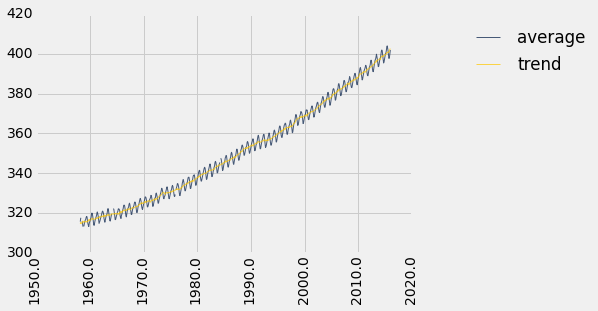

In [44]:
co2.select(["decimal_date", "average", "trend"]).plot("decimal_date", ["average","trend"], lw=1)

Topics:

- Subsetting data with `select()` vs `values()` 
- Basic plotting with `matplotlib`, controlling plot appearances
- Introduce pandas module for simple plotting

In [7]:
pd.read_csv?

Matplotlib allows for a lot of customization of how our plot will appear.  Effective visualizations are an integral part of data science, poorly organized or poorly labelled figures can be as much a source of peril as understanding.  Nevertheless, the ability to generate plots quickly with minimal tinkering is an essential skill.  As standards for visualizations have increased, too often visualization is seen as an ends rather than a means of data analysis. See [Fox & Hendler (2011)](http://science.sciencemag.org/content/331/6018/705.short) for more discussion of this.

A few sources for customizing plots in matplotlib:

- http://matplotlib.org/
- http://www.datacarpentry.org/python-ecology/06-plotting-with-matplotlib
 

## What do we see?

Our "Figure 1" shows three broad patterns:

- A trend of steadily increasing CO2 concentration from 1950 to 2015
- Small, regular seasonal oscillation is visible in the data
- Increase appears to be accelerating (convex curve)


## Exploring Seasonal Oscillations

- Demonstrate that the periodic behavior truly is seasonal
- What month is the maximum? What is the minimum?
- Is that consistent throughout the data?  Can you plot the month the minumum and maximum occurs in each year?  (**exercise for the reader**)
- What do you think could explain the seasonal cycle observed here?

We discussed how to zoom in on data show the seasonal cycle using the subsetting methods `where()` and `select()`.  
We also discussed presenting clean, readable code, using the following "chaining" trick, which allows us to write one command on each line by wrapping the whole expression in `(` `)` symbols.  

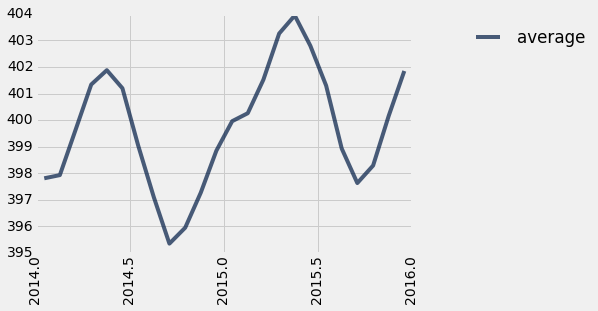

In [57]:

(
co2.
  where(co2.column("year") > 2013).
  select(["decimal_date", "average"]).
  plot("decimal_date", "average")
)


### Further exploration: 

- has the oscillation amplitude increased?

-------------------------

## Introducing `Pandas` 

Occassionally we will need functionality that is not yet available in the `Tables` module.  We take a moment to introduce the `pandas` module here.  


In [7]:
import pandas as pd


-----------------------------

# Understanding moving averages

## Trend, cycle, or noise?

- Weather vs Climate

> "Climate is what you expect, weather is what you get"

Present-day climate data is often sampled at both finer temporal and spatial scales than we might be interested in when exploring long-term trends.  More frequent sampling can reveal higher-frequency trends, such as the seasonal pattern we observe in the CO2 record.  It can also reveal somewhat greater variability, picking up more random (stochastic) sources of variation such as weather patterns.  

To reveal long term trends it is frequently valuable to average out this high-frequency variation.  We could spend the whole course discussing ways such averaging or smoothing can be done, but instead we'll focus on the most common methods you will see already present in the climate data we examine.  The monthly record data we analyze here already shows some averaging.  How was this performed?


------------------------

# Your turn


- [Exercises Notebook -- Interact](http://data8.berkeley.edu/hub/interact?repo=ecology-connector&path=climate/climate-2-exercises.ipynb)

Or manually download: 

- [`.ipynb` Notebook file](http://data8.org/ecology-connector/climate/climate-2-exercises.ipynb)
